In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_excel('/Users/leela/Desktop/Sales-Analysis-master/superstore_sales.xlsx')

In [3]:
df.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,2011


In [5]:
df.shape

(51290, 21)

In [6]:
df.count()

order_id          51290
order_date        51290
ship_date         51290
ship_mode         51290
customer_name     51290
segment           51290
state             51290
country           51290
market            51290
region            51290
product_id        51290
category          51290
sub_category      51290
product_name      51290
sales             51290
quantity          51290
discount          51290
profit            51290
shipping_cost     51290
order_priority    51290
year              51290
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        51290 non-null  object        
 1   order_date      51290 non-null  datetime64[ns]
 2   ship_date       51290 non-null  datetime64[ns]
 3   ship_mode       51290 non-null  object        
 4   customer_name   51290 non-null  object        
 5   segment         51290 non-null  object        
 6   state           51290 non-null  object        
 7   country         51290 non-null  object        
 8   market          51290 non-null  object        
 9   region          51290 non-null  object        
 10  product_id      51290 non-null  object        
 11  category        51290 non-null  object        
 12  sub_category    51290 non-null  object        
 13  product_name    51290 non-null  object        
 14  sales           51290 non-null  float64       
 15  qu

In [8]:
df.isnull().sum()

order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_name     0
segment           0
state             0
country           0
market            0
region            0
product_id        0
category          0
sub_category      0
product_name      0
sales             0
quantity          0
discount          0
profit            0
shipping_cost     0
order_priority    0
year              0
dtype: int64

In [9]:
df.describe()

,sales,quantity,discount,profit,shipping_cost,year
count,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,246.490581,3.476545,0.142908,28.641740,26.375818,2012.777208
std,487.565361,2.278766,0.212280,174.424113,57.296810,1.098931
min,0.444000,1.000000,0.000000,-6599.978000,0.002000,2011.000000
25%,30.758625,2.000000,0.000000,0.000000,2.610000,2012.000000
50%,85.053000,3.000000,0.000000,9.240000,7.790000,2013.000000
75%,251.053200,5.000000,0.200000,36.810000,24.450000,2014.000000
max,22638.480000,14.000000,0.850000,8399.976000,933.570000,2014.000000


In [11]:
df['order_date'].min()

Timestamp('2011-01-01 00:00:00')

In [12]:
df['order_date'].max()

Timestamp('2014-12-31 00:00:00')

In [14]:
df['month_year'] = df['order_date'].apply(lambda x: x.strftime('%y-%m'))

In [18]:
df_trend = df.groupby('month_year').sum()['sales'].reset_index()

/var/folders/4v/4nzrtd4d0nzg_46vk_7pbmw00000gn/T/ipykernel_12296/2028831395.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_trend = df.groupby('month_year').sum()['sales'].reset_index()


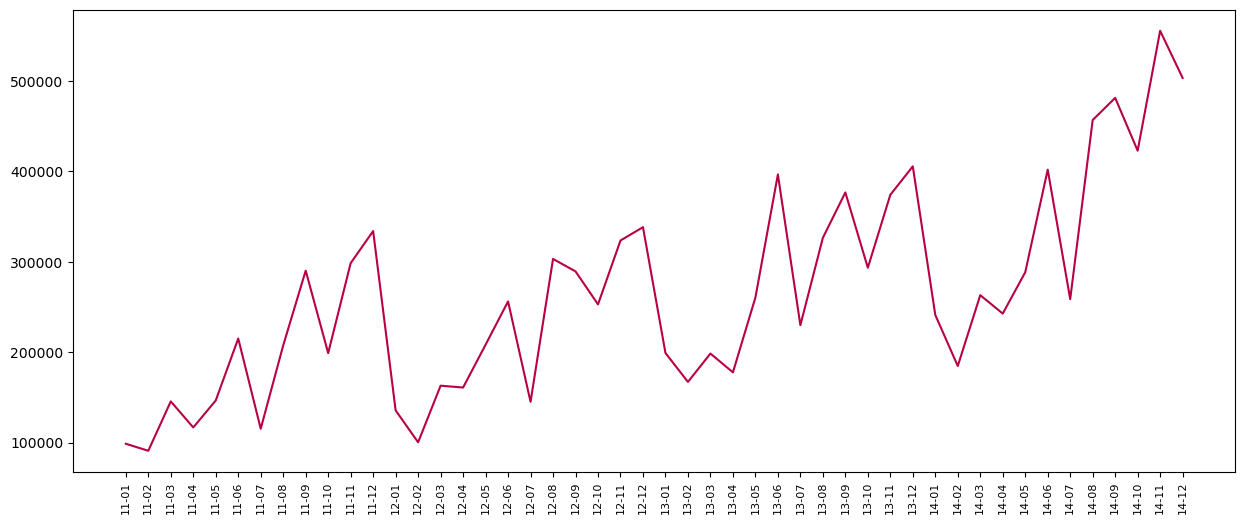

In [24]:
plt.figure(figsize=(15,6))
plt.plot(df_trend['month_year'],df_trend['sales'], color='#b80045')
plt.xticks(rotation='vertical', size=8)
plt.show()

In [25]:
prod_sales = pd.DataFrame(df.groupby('product_name').sum()['sales'])

/var/folders/4v/4nzrtd4d0nzg_46vk_7pbmw00000gn/T/ipykernel_12296/728044199.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  prod_sales = pd.DataFrame(df.groupby('product_name').sum()['sales'])


In [26]:
prod_sales = prod_sales.sort_values('sales',ascending =False)

In [27]:
prod_sales[:10]

,sales
product_name,
"Apple Smart Phone, Full Size",86935.7786
"Cisco Smart Phone, Full Size",76441.5306
"Motorola Smart Phone, Full Size",73156.3030
"Nokia Smart Phone, Full Size",71904.5555
Canon imageCLASS 2200 Advanced Copier,61599.8240
"Hon Executive Leather Armchair, Adjustable",58193.4841
"Office Star Executive Leather Armchair, Adjustable",50661.6840
"Harbour Creations Executive Leather Armchair, Adjustable",50121.5160
"Samsung Smart Phone, Cordless",48653.4600


In [30]:
most_sell_prod = df.groupby('product_name').sum()['quantity']

/var/folders/4v/4nzrtd4d0nzg_46vk_7pbmw00000gn/T/ipykernel_12296/1634686440.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  most_sell_prod = df.groupby('product_name').sum()['quantity']


In [36]:
most_sell_prod_sort = most_sell_prod.sort_values(ascending=False)

In [38]:
most_sell_prod_sort[:10]

product_name
Staples                                  876
Cardinal Index Tab, Clear                337
Eldon File Cart, Single Width            321
Rogers File Cart, Single Width           262
Sanford Pencil Sharpener, Water Color    259
Stockwell Paper Clips, Assorted Sizes    253
Avery Index Tab, Clear                   252
Ibico Index Tab, Clear                   251
Smead File Cart, Single Width            250
Stanley Pencil Sharpener, Water Color    242
Name: quantity, dtype: int64

<Axes: xlabel='ship_mode', ylabel='count'>

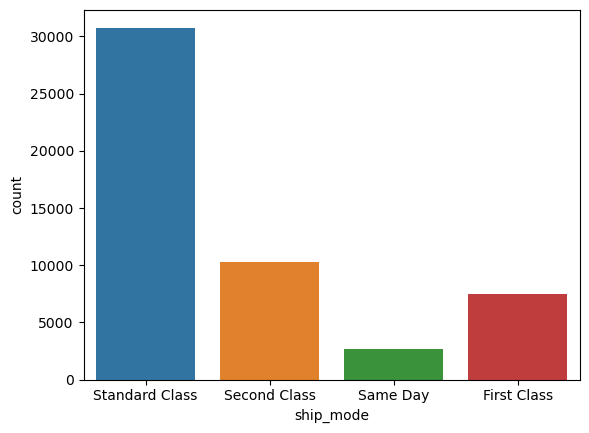

In [40]:
sns.countplot(x='ship_mode',data=df)

In [49]:
profit_category = pd.DataFrame(df.groupby(['category','sub_category']).sum()['profit'])

/var/folders/4v/4nzrtd4d0nzg_46vk_7pbmw00000gn/T/ipykernel_12296/2928952537.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  profit_category = pd.DataFrame(df.groupby(['category','sub_category']).sum()['profit'])


In [50]:
profit_category.sort_values(['category','sub_category'],ascending=False)

profit
category        sub_category              
Technology      Phones        216717.00580
                Machines       58867.87300
                Copiers       258567.54818
                Accessories   129626.30620
Office Supplies Supplies       22583.26310
                Storage       108461.48980
                Paper          59207.68270
                Labels         15010.51200
                Fasteners      11525.42410
                Envelopes      29601.11630
                Binders        72449.84600
                Art            57953.91090
                Appliances    141680.58940
Furniture       Tables        -64083.38870
                Furnishings    46967.42550
                Chairs        141973.79750
                Bookcases     161924.41950